In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
from IPython.display import HTML
style = '<style>svg{width:70% !important;height:70% !important;}</style>'
HTML(style)

In [5]:
titanic_data = pd.read_csv('train.csv')

In [6]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = titanic_data.Survived

In [9]:
X = pd.get_dummies(X)

In [10]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [11]:
X.Age.median()

28.0

In [12]:
X = X.fillna(28)

In [13]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [22]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [23]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [50]:
X_train.shape

(596, 10)

In [51]:
X_test.shape

(295, 10)

In [19]:
clf.score(X, y)

NameError: name 'clf' is not defined

In [36]:
max_depth_values = range(1, 100)

In [52]:
scores_data = pd.DataFrame()

In [53]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score], 
                                     'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [54]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.798711


In [55]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score', 'test_score', 'cross_val_score'], 
                           var_name = 'set_type', value_name = 'score')

In [56]:
scores_data_long.tail()

,max_depth,set_type,score
292,95,cross_val_score,0.770182
293,96,cross_val_score,0.766835
294,97,cross_val_score,0.770182
295,98,cross_val_score,0.773557
296,99,cross_val_score,0.770168


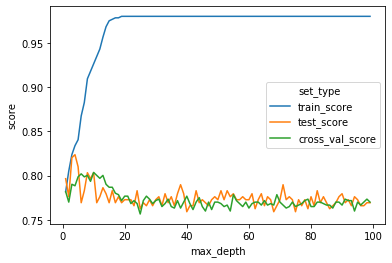

In [57]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [51]:
cross_val_score(clf, X_train, y_train, cv = 5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [84]:
train_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col = 0)

In [85]:
train_iris.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [86]:
test_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col = 0)

In [99]:
test_iris.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [116]:
scores_iris = pd.DataFrame()

In [89]:
X_iris_train = train_iris.drop('species', axis = 1)
y_iris_train = train_iris.species

In [90]:
X_iris_test = test_iris.drop('species', axis = 1)
y_iris_test = test_iris.species

In [117]:
np.random.seed(0)

In [118]:
for max_depth in max_depth_values:
    my_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    my_tree.fit(X_iris_train, y_iris_train)
    train_score = my_tree.score(X_iris_train, y_iris_train)
    test_score = my_tree.score(X_iris_test, y_iris_test)
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_iris = scores_iris.append(temp_score_data)

In [119]:
scores_iris.head(4)

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92


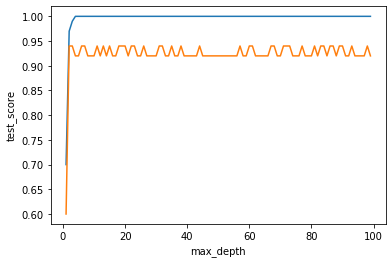

In [120]:
sns.lineplot(x = 'max_depth', y = 'train_score', data = scores_iris)
sns.lineplot(x = 'max_depth', y = 'test_score', data = scores_iris)

In [146]:
test_df = pd.read_json('dataset_209691_15 (1).txt')
train_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [147]:
train_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [148]:
test_df

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,33,39.6,1,1,0
1,15,18.0,1,1,0
2,16,19.2,1,1,0
3,32,38.4,1,1,0
4,15,18.0,1,1,0
...,...,...,...,...,...
95,14,5.6,1,0,1
96,13,5.2,1,0,1
97,14,5.6,1,0,1
98,6,2.4,1,0,1


In [149]:
X_new = train_df.drop('Вид', axis = 1)
y_new = train_df.Вид

In [138]:
y_new.head()

0    собачка
1    собачка
2    собачка
3    собачка
4    собачка
Name: Вид, dtype: object

In [150]:
new_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
new_tree.fit(X_new, y_new)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [151]:
h = new_tree.predict(test_df)
lst = list(h)
lst.count('собачка')

54

In [29]:
from sklearn.model_selection import GridSearchCV

In [4]:
clf = tree.DecisionTreeClassifier()

In [5]:
parameters = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1, 100)}

In [6]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv = 5)

In [25]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [26]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [34]:
best_clf = grid_search_cv_clf.best_estimator_

In [35]:
grid_search_cv_clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [30]:
y_pred = best_clf.predict(X_test)

In [31]:
precision_score(y_test, y_pred)

0.8061224489795918

In [33]:
recall_score(y_test, y_pred)

0.6583333333333333

In [18]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [29]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Alexander\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    python-graphviz-0.14       |             py_0          25 KB
    ------------------------------------------------------------
                                           Total:        32.2 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.14-py_0

The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.8.3-py37_0




python-graphviz-0.14 | 25 KB     |            |   0% 
python-graphv

In [23]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 100, min_samples_leaf = 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

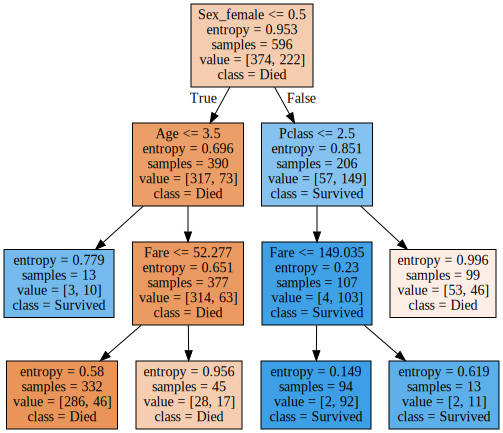

In [24]:
graph = Source(tree.export_graphviz(clf, out_file=None
    , feature_names=list(X), class_names=['Died', 'Survived'], filled = True))

display(SVG(graph.pipe(format='svg')))

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf_rf = RandomForestClassifier()

In [36]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [37]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)

In [38]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [39]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [40]:
best_clf = grid_search_cv_clf.best_estimator_

In [41]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [44]:
feature_importances = best_clf.feature_importances_

In [45]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})

In [49]:
feature_importances_df.sort_values('feature_importances', ascending = False)

,features,feature_importances
6,Sex_male,0.271391
4,Fare,0.169720
0,Pclass,0.151942
1,Age,0.143022
5,Sex_female,0.131846
3,Parch,0.043119
2,SibSp,0.040093
9,Embarked_S,0.021211
8,Embarked_Q,0.014552
7,Embarked_C,0.013103


In [56]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [53]:
df = pd.read_csv('heart.csv')

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
X_heart_train = df.drop('target', axis = 1)
y_heart_train = df.target

In [57]:
rf.fit(X_heart_train, y_heart_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

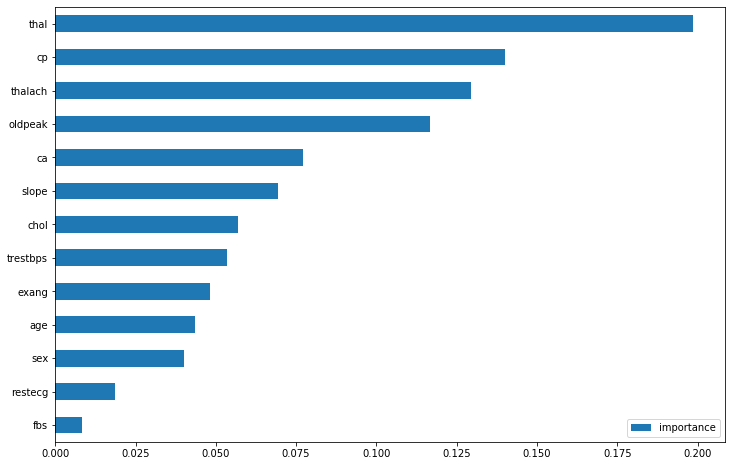

In [59]:
imp = pd.DataFrame(rf.feature_importances_, index=X_heart_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))